In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
def load_dataset(root_path):
    processed_images = []
    raw_images = []
    labels = []

    gesture_names = {
        "01_palm": 0,
        "02_l": 1,
        "03_fist": 2,
        "04_fist_moved": 3,
        "05_thumb": 4,
        "06_index": 5,
        "07_ok": 6,
        "08_palm_moved": 7,
        "09_c": 8,
        "10_down": 9
    }

    for subject in os.listdir(root_path):
        subject_path = os.path.join(root_path, subject)
        if not os.path.isdir(subject_path):
            continue

        for gesture in os.listdir(subject_path):
            gesture_path = os.path.join(subject_path, gesture)
            if gesture not in gesture_names:
                continue

            label = gesture_names[gesture]

            for img_file in os.listdir(gesture_path):
                if img_file.endswith(".png"):
                    img_path = os.path.join(gesture_path, img_file)
                    img_raw = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img_raw is not None:
                        raw_images.append(img_raw.copy())  # Save raw image
                        img = cv2.resize(img_raw, (64, 64))
                        img = img / 255.0
                        processed_images.append(img)
                        labels.append(label)

    return (np.array(raw_images), np.array(processed_images), 
            np.array(labels), gesture_names)


root_path = r"C:\Users\MITHUN\Documents\Prodigy_Internship\HandGesture\leapGestRecog"

In [3]:
raw_X, X, y, label_map = load_dataset(root_path)
id_to_label = {v: k for k, v in label_map.items()}

X = X.reshape(-1, 64, 64, 1)
y = to_categorical(y, num_classes=10)

# Use same split for raw images
X_train, X_test, y_train, y_test, raw_train, raw_test = train_test_split(
    X, y, raw_X, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)


In [4]:
from keras.callbacks import EarlyStopping
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2,
                    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)])


C:\Users\MITHUN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.5784 - loss: 1.2285 - val_accuracy: 0.9906 - val_loss: 0.0388
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9708 - loss: 0.1016 - val_accuracy: 0.9991 - val_loss: 0.0062
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9860 - loss: 0.0494 - val_accuracy: 0.9987 - val_loss: 0.0040
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9877 - loss: 0.0419 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9924 - loss: 0.0254 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9945 - loss: 0.0195 - val_accuracy: 0.9997 - val_loss: 0.0017
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9954 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 5.0789e-04
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9961 - loss: 0.0133 - val

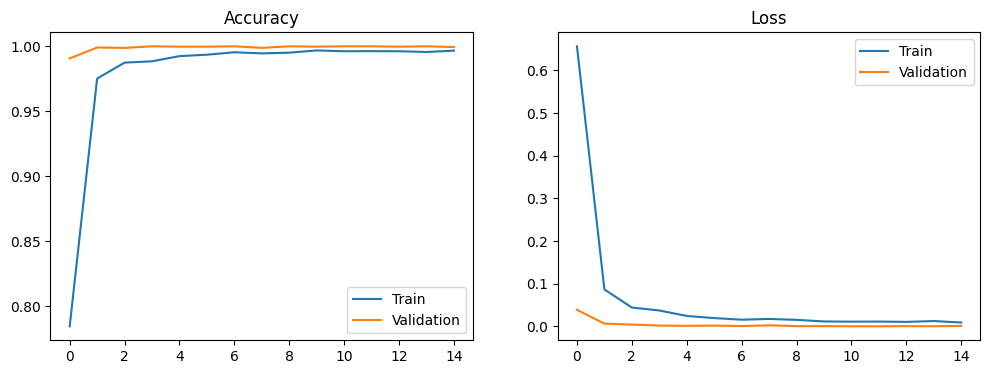

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


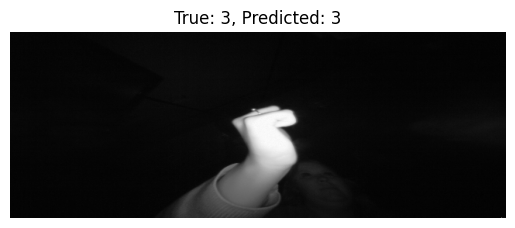

In [6]:
index = np.random.randint(0, len(X_test))

# Predict on processed image
image = X_test[index]
true_label = np.argmax(y_test[index])
predicted_label = np.argmax(model.predict(image.reshape(1, 64, 64, 1)))

# Show original image (before resize/normalize)
raw_image = raw_test[index]

plt.imshow(raw_image, cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()


In [ ]:
import cv2

def predict_gesture(img):
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = img.reshape(1, 64, 64, 1)
    prediction = model.predict(img)
    return np.argmax(prediction), np.max(prediction)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    roi = gray[100:300, 100:300]
    gesture_id, confidence = predict_gesture(roi)
    
    label = id_to_label[gesture_id]

    cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 2)
    cv2.putText(frame, f"{label} ({confidence:.2f})", (100, 90),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
    
    cv2.imshow("Gesture Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━